#  Import Data and Required Packages

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime

# Modelling
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Ridge,Lasso, ElasticNet
# from catboost import CatBoostRegressor, Pool
# from xgboost import XGBRegressor


In [2]:
df = pd.read_csv('final_data.csv')
df.head(10)

,volume,date,day_of_the_week,is_holiday
0,5.0,2019-01-01,Tuesday,True
1,558.0,2019-01-02,Wednesday,False
2,455.0,2019-01-03,Thursday,False
3,418.0,2019-01-04,Friday,False
4,198.0,2019-01-05,Saturday,False
5,0.0,2019-01-06,Sunday,False
6,480.0,2019-01-07,Monday,False
7,426.0,2019-01-08,Tuesday,False
8,413.0,2019-01-09,Wednesday,False
9,407.0,2019-01-10,Thursday,False


In [3]:
df.shape

(364, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   volume           364 non-null    float64
 1   date             364 non-null    object 
 2   day_of_the_week  364 non-null    object 
 3   is_holiday       364 non-null    bool   
dtypes: bool(1), float64(1), object(2)
memory usage: 9.0+ KB


In [5]:
df['date'] = pd.to_datetime(df['date'])
df['day_of_the_week'] = df['date'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   volume           364 non-null    float64       
 1   date             364 non-null    datetime64[ns]
 2   day_of_the_week  364 non-null    category      
 3   is_holiday       364 non-null    bool          
dtypes: bool(1), category(1), datetime64[ns](1), float64(1)
memory usage: 17.8 KB


In [6]:
df.describe()

,volume
count,364.000000
mean,288.041209
std,185.711901
min,0.000000
25%,122.000000
50%,370.000000
75%,425.250000
max,615.000000


In [7]:
df.tail()

,volume,date,day_of_the_week,is_holiday
359,338.0,2019-12-27,2019-12-27,False
360,103.0,2019-12-28,2019-12-28,False
361,0.0,2019-12-29,2019-12-29,False
362,391.0,2019-12-30,2019-12-30,False
363,305.0,2019-12-31,2019-12-31,False


# ARIMA

In [8]:
time_series = df['volume']
model = ARIMA(time_series, order=(1, 1, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 volume   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2397.240
Date:                Thu, 31 Aug 2023   AIC                           4800.481
Time:                        18:47:52   BIC                           4812.164
Sample:                             0   HQIC                          4805.125
                                - 364                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3017      0.050      6.012      0.000       0.203       0.400
ma.L1         -0.9998      0.355     -2.818      0.005      -1.695      -0.304
sigma2      3.144e+04   1.25e+04      2.524      0.0

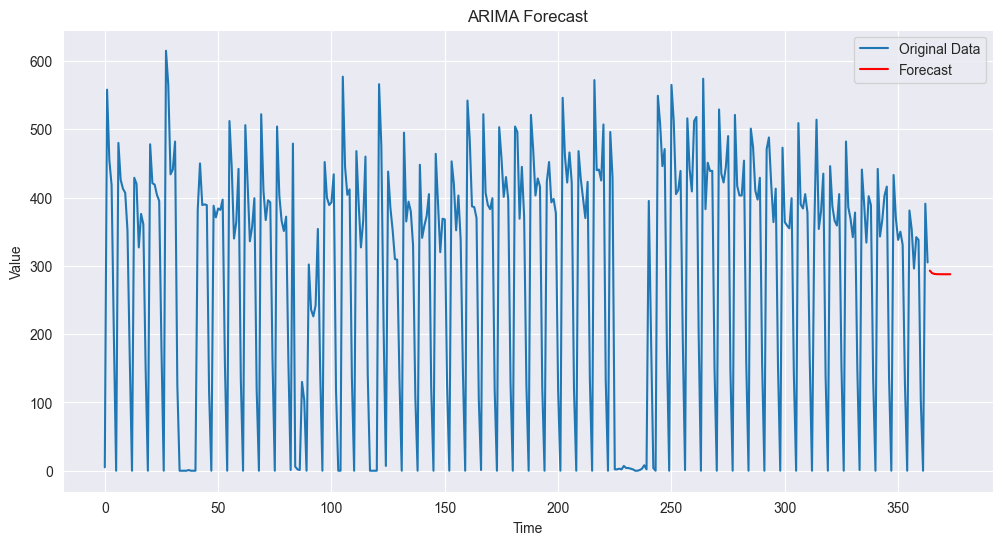

In [9]:
# Forecast the next 'n' steps
n_forecast = 10
forecast = model_fit.forecast(steps=n_forecast)

# Plot original data and forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original Data')
plt.plot(np.arange(len(time_series), len(time_series) + n_forecast), forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

# SARIMA

# Decision Trees

In [10]:
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = df['date'].dt.isocalendar().day
df['dayofyear'] = pd.DatetimeIndex(df['date']).dayofyear
df['weekofyear'] = df['date'].dt.isocalendar().week
df['weekday'] = pd.DatetimeIndex(df['date']).weekday
df['quarter'] = pd.DatetimeIndex(df['date']).quarter
df['is_month_start'] = pd.DatetimeIndex(df['date']).is_month_start
df['is_month_end'] = pd.DatetimeIndex(df['date']).is_month_end
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   volume           364 non-null    float64       
 1   date             364 non-null    datetime64[ns]
 2   day_of_the_week  364 non-null    category      
 3   is_holiday       364 non-null    bool          
 4   month            364 non-null    int64         
 5   day              364 non-null    UInt32        
 6   dayofyear        364 non-null    int64         
 7   weekofyear       364 non-null    UInt32        
 8   weekday          364 non-null    int64         
 9   quarter          364 non-null    int64         
 10  is_month_start   364 non-null    bool          
 11  is_month_end     364 non-null    bool          
dtypes: UInt32(2), bool(3), category(1), datetime64[ns](1), float64(1), int64(4)
memory usage: 33.5 KB


In [11]:
df = df.drop(['date'], axis = 1) 
df = df.drop(['day_of_the_week'], axis = 1) 
df.head()

,volume,is_holiday,month,day,dayofyear,weekofyear,weekday,quarter,is_month_start,is_month_end
0,5.0,True,1,2,1,1,1,1,True,False
1,558.0,False,1,3,2,1,2,1,False,False
2,455.0,False,1,4,3,1,3,1,False,False
3,418.0,False,1,5,4,1,4,1,False,False
4,198.0,False,1,6,5,1,5,1,False,False


In [12]:
df = pd.get_dummies(df, columns=['month'], drop_first=True, prefix='month')
df = pd.get_dummies(df, columns=['weekday'], drop_first=True, prefix='wday')
df = pd.get_dummies(df, columns=['quarter'], drop_first=True, prefix='qrtr')
df = pd.get_dummies(df, columns=['is_month_start'], drop_first=True, prefix='m_start')
df = pd.get_dummies(df, columns=['is_month_end'], drop_first=True, prefix='m_end')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        364 non-null    float64
 1   is_holiday    364 non-null    bool   
 2   day           364 non-null    UInt32 
 3   dayofyear     364 non-null    int64  
 4   weekofyear    364 non-null    UInt32 
 5   month_2       364 non-null    uint8  
 6   month_3       364 non-null    uint8  
 7   month_4       364 non-null    uint8  
 8   month_5       364 non-null    uint8  
 9   month_6       364 non-null    uint8  
 10  month_7       364 non-null    uint8  
 11  month_8       364 non-null    uint8  
 12  month_9       364 non-null    uint8  
 13  month_10      364 non-null    uint8  
 14  month_11      364 non-null    uint8  
 15  month_12      364 non-null    uint8  
 16  wday_1        364 non-null    uint8  
 17  wday_2        364 non-null    uint8  
 18  wday_3        364 non-null    

In [13]:
x = df.drop(['volume'], axis=1)
y = df['volume']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=88)
print(X_train.shape, X_test.shape)

(291, 26) (73, 26)


### Random Forest

In [14]:
#Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=88)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

23.720145127712122
0.984123275308611
45.53402369326293
0.9295081018247456


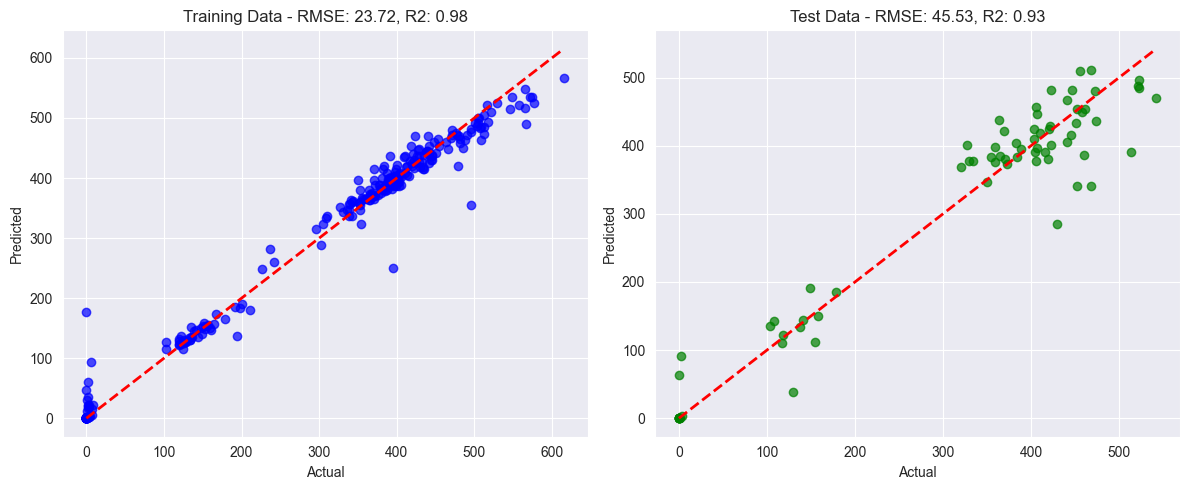

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Assuming you've defined X_train, y_train, X_test, and y_test

# Train the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=88)
model_rf.fit(X_train, y_train)

# Predictions on training data
pred_train_rf = model_rf.predict(X_train)

# Metrics on training data
rmse_train = np.sqrt(mean_squared_error(y_train, pred_train_rf))
r2_train = r2_score(y_train, pred_train_rf)

# Predictions on test data
pred_test_rf = model_rf.predict(X_test)

# Metrics on test data
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test_rf))
r2_test = r2_score(y_test, pred_test_rf)

# Create scatter plots for training and test data
plt.figure(figsize=(12, 5))

# Training data scatter plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, pred_train_rf, color='blue', alpha=0.7)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Training Data - RMSE: {rmse_train:.2f}, R2: {r2_train:.2f}')

# Test data scatter plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, pred_test_rf, color='green', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Test Data - RMSE: {rmse_test:.2f}, R2: {r2_test:.2f}')

plt.tight_layout()
plt.show()


### Trees

In [16]:
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)

In [17]:
# Code lines 1 to 3
pred_train_tree= dtree.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_tree)))
print(r2_score(y_train, pred_train_tree))

# Code lines 4 to 6
pred_test_tree= dtree.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
print(r2_score(y_test, pred_test_tree))

117.8896644003661
0.6078269976103685
103.66980368705865
0.6345973445601925


In [18]:
# Code Lines 1 to 4: Fit the regression tree 'dtree1' and 'dtree2' 
dtree1 = DecisionTreeRegressor(max_depth=2)
dtree2 = DecisionTreeRegressor(max_depth=5)
dtree1.fit(X_train, y_train)
dtree2.fit(X_train, y_train)

# Code Lines 5 to 6: Predict on training data
tr1 = dtree1.predict(X_train)
tr2 = dtree2.predict(X_train) 

#Code Lines 7 to 8: Predict on testing data
y1 = dtree1.predict(X_test)
y2 = dtree2.predict(X_test)

In [19]:
# Print RMSE and R-squared value for regression tree 'dtree1' on training data
print(np.sqrt(mean_squared_error(y_train,tr1))) 
print(r2_score(y_train, tr1))

# Print RMSE and R-squared value for regression tree 'dtree1' on testing data
print(np.sqrt(mean_squared_error(y_test,y1))) 
print(r2_score(y_test, y1))

103.03151423078118
0.7004520198464261
89.5225370164792
0.7275217072289477


In [20]:
# Print RMSE and R-squared value for regression tree 'dtree2' on training data
print(np.sqrt(mean_squared_error(y_train,tr2))) 
print(r2_score(y_train, tr2))

# Print RMSE and R-squared value for regression tree 'dtree2' on testing data
print(np.sqrt(mean_squared_error(y_test,y2))) 
print(r2_score(y_test, y2))

64.75986890159653
0.8816582050626258
55.59236690386453
0.8949254649873682
